<a href="https://colab.research.google.com/github/Aksharalakshmim2001/Interny/blob/main/Interny2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**FINANCIAL FRAUD DETECTION**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83274,59766,-0.465927,0.740705,1.731343,0.036013,0.098876,0.055606,0.472815,0.134921,-0.302919,...,0.032294,0.287631,-0.337062,0.079929,0.091760,0.396666,0.078020,0.093914,1.00,0.0
83275,59767,-0.725577,0.379742,1.468039,1.356958,0.546077,0.109718,0.416071,0.180774,-0.273686,...,0.006224,0.017405,-0.101053,-0.294967,0.164357,-0.166337,0.114452,0.115366,46.96,0.0
83276,59768,-1.711347,1.308095,-0.232786,-1.607585,-1.299910,-0.627938,-1.562053,-1.722859,-1.534618,...,-0.902970,1.269219,0.178712,0.527195,-0.313104,-0.365365,0.216308,0.181065,10.00,0.0
83277,59768,1.471591,-1.234024,0.279178,-1.595504,-1.344324,-0.101130,-1.249330,0.030445,-1.813220,...,0.000785,0.310947,-0.194016,-0.504003,0.513079,0.008417,0.029493,0.007596,40.00,0.0
83278,59769,1.135220,0.124163,0.109082,0.902728,0.038998,0.004539,0.007332,0.113029,-0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(83279, 31)

####**Remove missing values, duplicates and outliers using pandas**

In [ ]:
#Remove missing values
df = df.dropna()
#Remove duplicates
df = df.drop_duplicates()
#Remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
df = remove_outliers_iqr(df, 'Amount')
df.shape

(74155, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,...,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000,74155.000000
mean,37862.375592,-0.156282,0.192378,0.733500,0.149299,-0.148432,0.032532,-0.200670,0.078735,-0.019339,...,-0.050138,-0.102117,-0.028581,0.006573,0.134906,0.024031,0.004238,0.000957,41.364909,0.002427
std,15677.128696,1.756884,1.291146,1.362461,1.347444,1.206294,1.237986,1.051137,1.172468,1.123850,...,0.693455,0.622295,0.442052,0.597251,0.435087,0.488711,0.356307,0.271110,48.773760,0.049209
min,0.000000,-34.148234,-35.616754,-33.680984,-5.172595,-23.669726,-23.496714,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.440626,-9.390980,-8.478686,0.000000,0.000000
25%,30688.000000,-0.948102,-0.398960,0.246911,-0.723156,-0.760861,-0.677059,-0.624372,-0.128003,-0.674025,...,-0.230972,-0.522129,-0.156646,-0.330443,-0.133039,-0.324762,-0.051858,-0.005938,5.990000,0.000000
50%,40511.000000,-0.215867,0.162089,0.813115,0.179013,-0.235189,-0.199527,-0.098208,0.075846,-0.097652,...,-0.072812,-0.078811,-0.043041,0.063837,0.174991,-0.061148,0.014601,0.020594,20.000000,0.000000
75%,50188.000000,1.174405,0.797482,1.426158,1.024260,0.306735,0.400376,0.354359,0.358916,0.587299,...,0.088344,0.306450,0.076476,0.404038,0.424299,0.294979,0.086079,0.061397,59.990000,0.000000
max,59768.000000,1.960497,18.902453,4.226108,11.927512,34.099309,8.933762,6.192463,20.007208,10.392889,...,22.614889,5.805795,13.659458,4.014444,4.881207,3.517346,8.254376,7.512250,213.170000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74155 entries, 0 to 83277
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    74155 non-null  int64  
 1   V1      74155 non-null  float64
 2   V2      74155 non-null  float64
 3   V3      74155 non-null  float64
 4   V4      74155 non-null  float64
 5   V5      74155 non-null  float64
 6   V6      74155 non-null  float64
 7   V7      74155 non-null  float64
 8   V8      74155 non-null  float64
 9   V9      74155 non-null  float64
 10  V10     74155 non-null  float64
 11  V11     74155 non-null  float64
 12  V12     74155 non-null  float64
 13  V13     74155 non-null  float64
 14  V14     74155 non-null  float64
 15  V15     74155 non-null  float64
 16  V16     74155 non-null  float64
 17  V17     74155 non-null  float64
 18  V18     74155 non-null  float64
 19  V19     74155 non-null  float64
 20  V20     74155 non-null  float64
 21  V21     74155 non-null  float64
 22  V22

####**Encode categorical variables using pandas' `get_dummies()` function.**

In [ ]:
df_encoded = pd.get_dummies(df)
print("Encoded DataFrame:",df_encoded)

Encoded DataFrame:         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5          2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
...      ...       ...       ...       ...       ...       ...       ...   
83273  59766  1.151633 -0.032472  1.284557  1.343330 -0.981827 -0.199896   
83274  59766 -0.465927  0.740705  1.731343  0.036013  0.098876  0.055606   
83275  59767 -0.725577  0.379742  1.468039  1.356958  0.546077  0.109718   
83276  59768 -1.711347  1.308095 -0.232786 -1.607585 -1.299910 -0.627938   
83277  59768  1.471591 -1.234024  0.279178 -1.595504 -1.344324 -0.101130   

             V7        V8        V9  ...       V21       V22       V

####**Visualize transaction patterns using histograms**

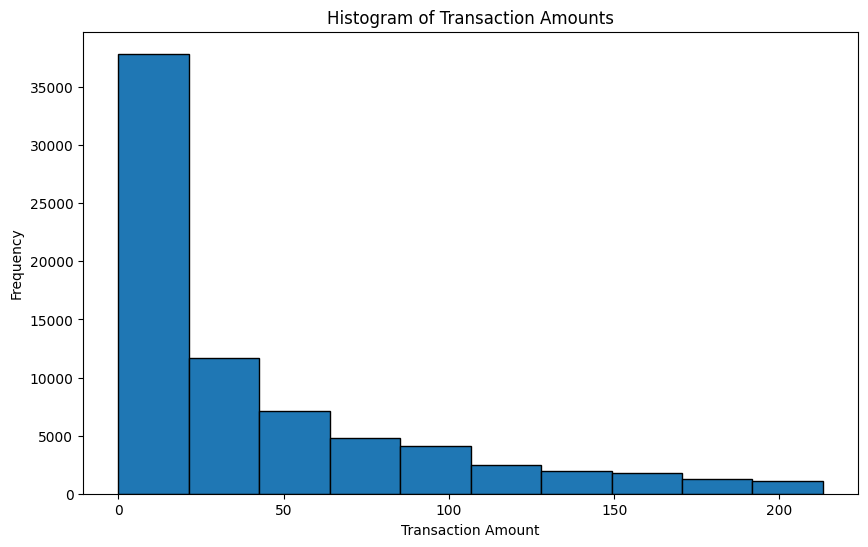

In [ ]:
#Histogram of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=10,edgecolor='black')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

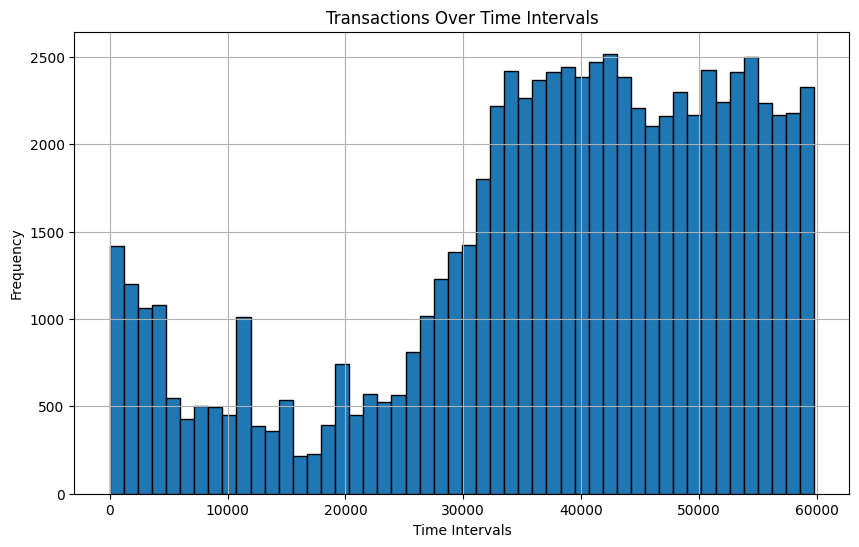

In [ ]:
#Histogram of transaction time
plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=50, edgecolor='black')
plt.title('Transactions Over Time Intervals')
plt.xlabel('Time Intervals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

####**Identify anomalies in transaction data using box plot**

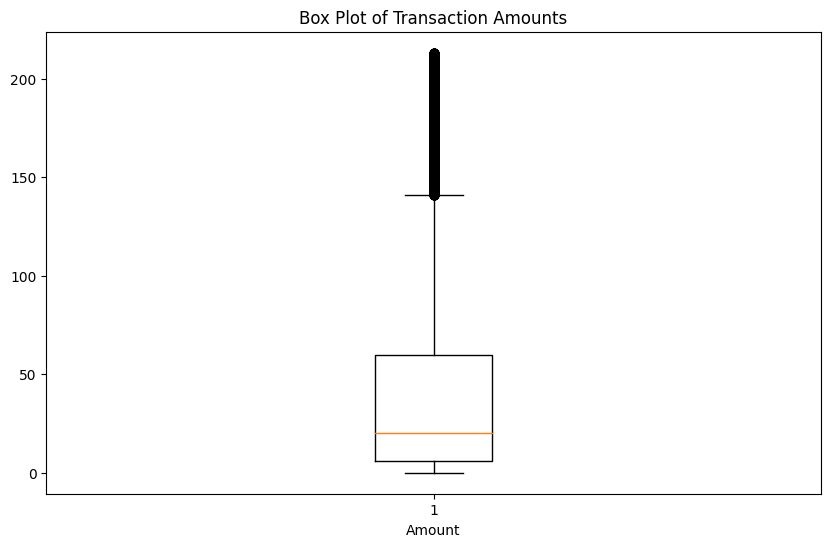

In [ ]:
# Box plot of transaction amount
plt.figure(figsize=(10, 6))
plt.boxplot(df['Amount'])
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

####**Calculate summary statistics for transaction amounts and frequencies**

In [ ]:
#Summary statistics for transaction amounts
amount_summary = df['Amount'].describe()
print(amount_summary)

count    74155.000000
mean        41.364909
std         48.773760
min          0.000000
25%          5.990000
50%         20.000000
75%         59.990000
max        213.170000
Name: Amount, dtype: float64


In [ ]:
#Summary statistics for transaction frequencies
frequency_summary = df['Time'].value_counts().describe()
print(frequency_summary)

count    37147.000000
mean         1.996258
std          1.236530
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         21.000000
Name: count, dtype: float64
